In [ ]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim

import torch.nn.functional as F

In [ ]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

In [ ]:
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

In [ ]:
rcParams['figure.figsize'] = 12, 8

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
df = pd.read_csv('weatherAUS.csv')

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


from matplotlib import pyplot as plt
_df_0['MinTemp'].plot(kind='hist', bins=20, title='MinTemp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MaxTemp'].plot(kind='hist', bins=20, title='MaxTemp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rainfall'].plot(kind='hist', bins=20, title='Rainfall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['WindGustSpeed'].plot(kind='hist', bins=20, title='WindGustSpeed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('WindGustDir').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('WindDir9am').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('WindDir3pm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='MinTemp', y='MaxTemp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='MaxTemp', y='Rainfall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Rainfall', y='WindGustSpeed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='WindGustSpeed', y='WindSpeed9am', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['MinTemp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('MinTemp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['MinTemp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WindGustDir')):
  _plot_series(series, series_name, i)
  fig.legend(title='WindGustDir', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('MinTemp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['MinTemp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WindDir9am')):
  _plot_series(series, series_name, i)
  fig.legend(title='WindDir9am', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('MinTemp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['MinTemp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('WindDir3pm')):
  _plot_series(series, series_name, i)
  fig.legend(title='WindDir3pm', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('MinTemp')

from matplotlib import pyplot as plt
_df_16['MinTemp'].plot(kind='line', figsize=(8, 4), title='MinTemp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['MaxTemp'].plot(kind='line', figsize=(8, 4), title='MaxTemp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Rainfall'].plot(kind='line', figsize=(8, 4), title='Rainfall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['WindGustSpeed'].plot(kind='line', figsize=(8, 4), title='WindGustSpeed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WindGustDir'].value_counts()
    for x_label, grp in _df_20.groupby('Date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Date')
_ = plt.ylabel('WindGustDir')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WindDir9am'].value_counts()
    for x_label, grp in _df_21.groupby('WindGustDir')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('WindGustDir')
_ = plt.ylabel('WindDir9am')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WindDir3pm'].value_counts()
    for x_label, grp in _df_22.groupby('WindDir9am')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('WindDir9am')
_ = plt.ylabel('WindDir3pm')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='MinTemp', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['WindGustDir'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='MinTemp', y='WindGustDir', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['WindDir9am'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='MinTemp', y='WindDir9am', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['WindDir3pm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='MinTemp', y='WindDir3pm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
cols = ['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday', 'RainTomorrow']


In [ ]:
df = df[cols]

In [ ]:
df['RainToday'].replace({'No':0,'Yes':1}, inplace = True)
df['RainTomorrow'].replace({'No':0,'Yes':1}, inplace = True)

<ipython-input-16-b66e61dece04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'].replace({'No':0,'Yes':1}, inplace = True)
<ipython-input-16-b66e61dece04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow'].replace({'No':0,'Yes':1}, inplace = True)


In [ ]:
df = df.dropna(how='any')

In [ ]:
df

,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,0.6,22.0,1007.7,0.0,0.0
1,0.0,25.0,1010.6,0.0,0.0
2,0.0,30.0,1007.6,0.0,0.0
3,0.0,16.0,1017.6,0.0,0.0
4,1.0,33.0,1010.8,0.0,0.0
...,...,...,...,...,...
145454,0.0,27.0,1024.7,0.0,0.0
145455,0.0,24.0,1024.6,0.0,0.0
145456,0.0,21.0,1023.5,0.0,0.0
145457,0.0,24.0,1021.0,0.0,0.0


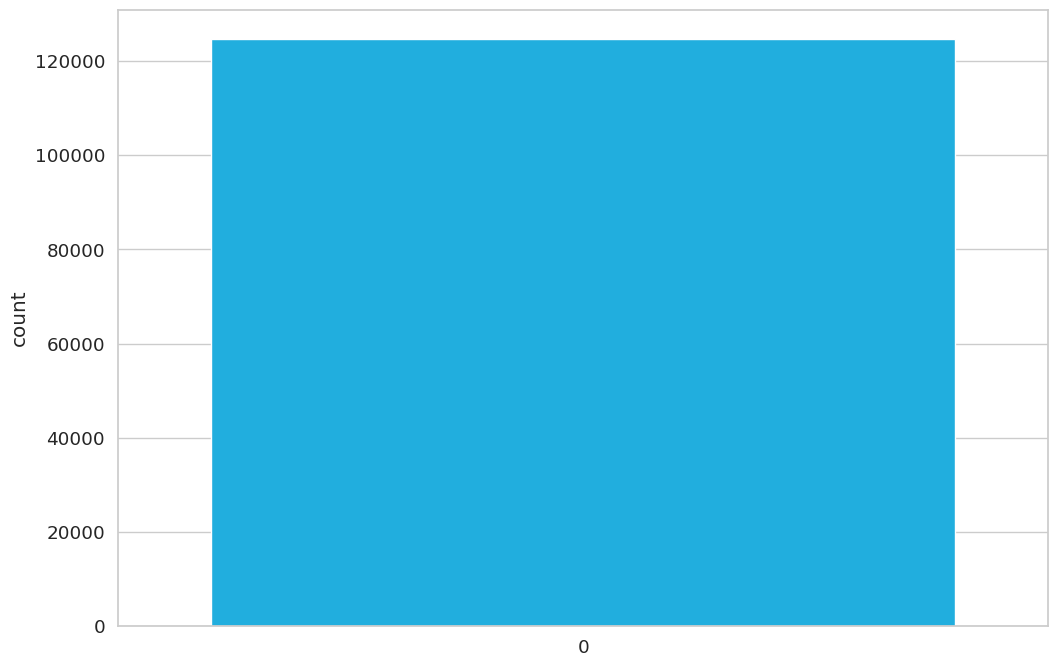

In [ ]:
sns.countplot(df.RainTomorrow);

In [ ]:
df.RainTomorrow.value_counts() / df.shape[0]

0.0    0.778762
1.0    0.221238
Name: RainTomorrow, dtype: float64

In [ ]:
X = df[['Rainfall', 'Humidity3pm', 'RainToday', 'Pressure9am']]
y = df[['RainTomorrow']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
X_train = torch.from_numpy(X_train.to_numpy()).float()

In [ ]:
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

In [ ]:
X_test = torch.from_numpy(X_test.to_numpy()).float()

In [ ]:
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([99751, 4]) torch.Size([99751])
torch.Size([24938, 4]) torch.Size([24938])


In [ ]:
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3, 1)

  def forward(self, X):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))

In [ ]:
net = Net(X_train.shape[1])

In [ ]:
!pip install  ann_visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz

In [ ]:
ann_viz(net, view=True)

AttributeError: ignored

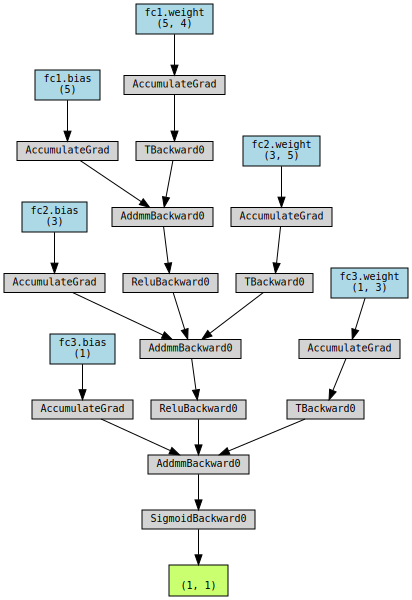

In [ ]:
# Generate a visualization of the computation graph
x = torch.randn(1, X_train.shape[1])  # Create a random input tensor
output = net(x)
make_dot(output, params=dict(net.named_parameters()))

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=13c2bd68a59520551a7063d2fd560231406841c9c03fdfd32153eacd565d3ffa
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
loss_fn = nn.BCELoss()

In [ ]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test.to(device)
y_test = y_test.to(device)
net = net.to(device)
loss_fn = loss_fn.to(device)

In [ ]:
def accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

In [ ]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)


In [ ]:
for epoch in range(1000):
    # Training
    net.train()

    # Forward pass
    y_pred = net(X_train)
    y = torch.squeeze(y_pred)
    train_loss = loss_fn(y_pred, y_train.view(-1, 1))  # Reshape y_train

    # Calculate accuracy
    train_acc = accuracy(y_train.view(-1), y_pred)

    # Backward pass and optimization
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Testing
    net.eval()

    with torch.inference_mode():
        # Forward pass
        y_test_pred = net(X_test)
        y_test_pred = torch.squeeze(y_test_pred)

        # Calculate loss and accuracy
        test_loss = loss_fn(y_test_pred, y_test.view(-1))  # Reshape y_test
        test_acc = accuracy(y_test.view(-1), y_test_pred)

    # Print out every 10 epochs
    if epoch % 10 == 0:
        print(f'''Epoch: {epoch} Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)} Test set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}''')

Epoch: 0 Train set - loss: 0.542, accuracy: 0.78 Test set - loss: 0.544, accuracy: 0.78
Epoch: 10 Train set - loss: 0.542, accuracy: 0.78 Test set - loss: 0.543, accuracy: 0.78
Epoch: 20 Train set - loss: 0.541, accuracy: 0.781 Test set - loss: 0.543, accuracy: 0.78
Epoch: 30 Train set - loss: 0.541, accuracy: 0.781 Test set - loss: 0.542, accuracy: 0.78
Epoch: 40 Train set - loss: 0.54, accuracy: 0.781 Test set - loss: 0.542, accuracy: 0.78
Epoch: 50 Train set - loss: 0.54, accuracy: 0.781 Test set - loss: 0.541, accuracy: 0.78
Epoch: 60 Train set - loss: 0.539, accuracy: 0.781 Test set - loss: 0.541, accuracy: 0.78
Epoch: 70 Train set - loss: 0.539, accuracy: 0.781 Test set - loss: 0.541, accuracy: 0.78
Epoch: 80 Train set - loss: 0.539, accuracy: 0.781 Test set - loss: 0.54, accuracy: 0.78
Epoch: 90 Train set - loss: 0.538, accuracy: 0.781 Test set - loss: 0.54, accuracy: 0.78
Epoch: 100 Train set - loss: 0.538, accuracy: 0.781 Test set - loss: 0.539, accuracy: 0.78
Epoch: 110 Train

In [ ]:
MODEL_PATH = 'model.pth'
torch.save(net, MODEL_PATH)

In [ ]:
net = torch.load(MODEL_PATH)

In [ ]:
classes = ['No rain', 'Raining']
y_pred = net(X_test)
y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_test.cpu()

In [ ]:
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

     No rain       0.85      0.96      0.90     19413
     Raining       0.73      0.42      0.53      5525

    accuracy                           0.84     24938
   macro avg       0.79      0.69      0.72     24938
weighted avg       0.83      0.84      0.82     24938



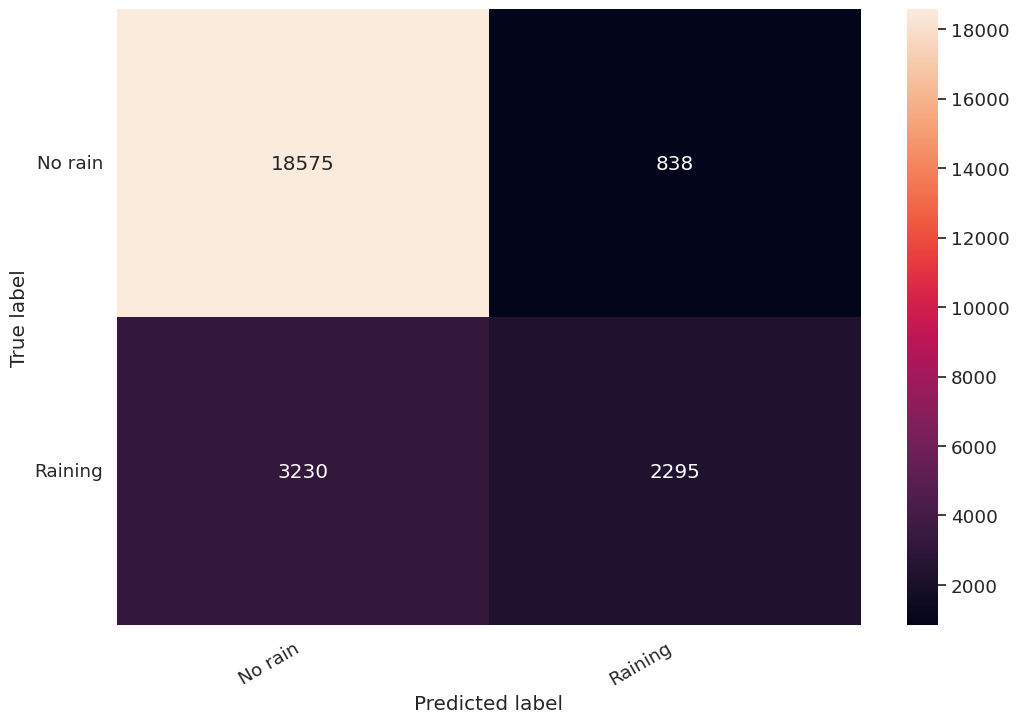

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');